In [119]:
import pandas as pd
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

## Initial cleaning

**Merging all file in one CSV**

In [120]:
interesting_files = glob.glob("/home/tomas/ADA/Notorious_ADA_Projet_2019/WHO_policy_timeline_edited/*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in interesting_files))
df.to_csv("Merged_policy.csv")

/home/tomas/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [121]:
merged_policy_df = pd.read_csv("/home/tomas/ADA/Notorious_ADA_Projet_2019/WHO_policy_timeline_edited/Merged_policy.csv")


**Deleting non useful columns**

In [122]:
merged_policy_df = merged_policy_df.drop(columns=['Data Source', 'Unnamed: 0'])
merged_policy_df.head(10)

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies,Year
0,"Major changes in licensing systems, pertaining...",NaN,Bulgaria,NaN,NaN,NaN,NaN,
1,The requirements for the retail sale of alcoho...,NaN,Russian Federation,NaN,NaN,NaN,NaN,
2,"Despite strong opposition of the Government, p...",NaN,Slovenia,NaN,NaN,NaN,NaN,2017
3,Adoption of a law which allows municipalities ...,NaN,Lithuania,NaN,NaN,NaN,NaN,2016
4,Ban on the sale of alcoholic beverages in petr...,NaN,Lithuania,NaN,NaN,NaN,NaN,2016
5,The requirements for the retail sale of alcoho...,NaN,Russian Federation,NaN,NaN,NaN,NaN,2016
6,Scotland: Publication of Alcohol Focus Scotlan...,NaN,United Kingdom of Great Britain and Northern ...,NaN,NaN,NaN,NaN,2016
7,Scotland: Scottish Qualifications Authority Al...,NaN,United Kingdom of Great Britain and Northern ...,NaN,NaN,NaN,NaN,2016
8,Decree of the President of the Republic of Bel...,NaN,Belarus,NaN,NaN,NaN,NaN,2015
9,The Law on Public Peace and Order (Official Ga...,NaN,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,2015


In [164]:
merged_policy_df_index = merged_policy_df

**Putting value 0 too all cells with no data**

In [165]:
merged_policy_df_index[merged_policy_df_index.isna()] = 0

In [166]:
merged_policy_df_index

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies,Year
0,"Major changes in licensing systems, pertaining...",0,Bulgaria,0,0,0,0,
1,The requirements for the retail sale of alcoho...,0,Russian Federation,0,0,0,0,
2,"Despite strong opposition of the Government, p...",0,Slovenia,0,0,0,0,2017
3,Adoption of a law which allows municipalities ...,0,Lithuania,0,0,0,0,2016
4,Ban on the sale of alcoholic beverages in petr...,0,Lithuania,0,0,0,0,2016
...,...,...,...,...,...,...,...,...
461,0,0,Kazakhstan,0,"On 6 April 2015, № 299-V SAM, in Code of the R...",0,0,2015
462,0,0,Portugal,0,Agreement with the alcohol industry to develop...,0,0,2015
463,0,0,Republic of Moldova,0,Development of a bill to ban advertising of al...,0,0,2015
464,0,0,Turkey,0,"On 10 January 2015, by the Directorate General...",0,0,2015


**Change string with 1**

In [167]:
merged_policy_df_index['Monitoring and surveillance'][merged_policy_df_index['Monitoring and surveillance'].apply(type) == str] = 1
merged_policy_df_index['Availability of alcohol'][merged_policy_df_index['Availability of alcohol'].apply(type) == str] = 1
merged_policy_df_index['Community and workplace action'][merged_policy_df_index['Community and workplace action'].apply(type) == str] = 1
merged_policy_df_index['Leadership, awareness and commitment'][merged_policy_df_index['Leadership, awareness and commitment'].apply(type) == str] = 1
merged_policy_df_index['Marketing of alcoholic beverages'][merged_policy_df_index['Marketing of alcoholic beverages'].apply(type) == str] = 1
merged_policy_df_index['Pricing policies'][merged_policy_df_index['Pricing policies'].apply(type) == str] = 1


In [127]:
merged_policy_df_index

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Year,,,,,,,
,1,0,Bulgaria,0,0,0,0
,1,0,Russian Federation,0,0,0,0
2017,1,0,Slovenia,0,0,0,0
2016,1,0,Lithuania,0,0,0,0
2016,1,0,Lithuania,0,0,0,0
...,...,...,...,...,...,...,...
2015,0,0,Kazakhstan,0,1,0,0
2015,0,0,Portugal,0,1,0,0
2015,0,0,Republic of Moldova,0,1,0,0


In [128]:
merged_policy_df_number = merged_policy_df_index

## Analysing number of policies by year

**Check number of policies by category per year**

In [129]:
policy_by_year = merged_policy_df_number.groupby("Year").sum()

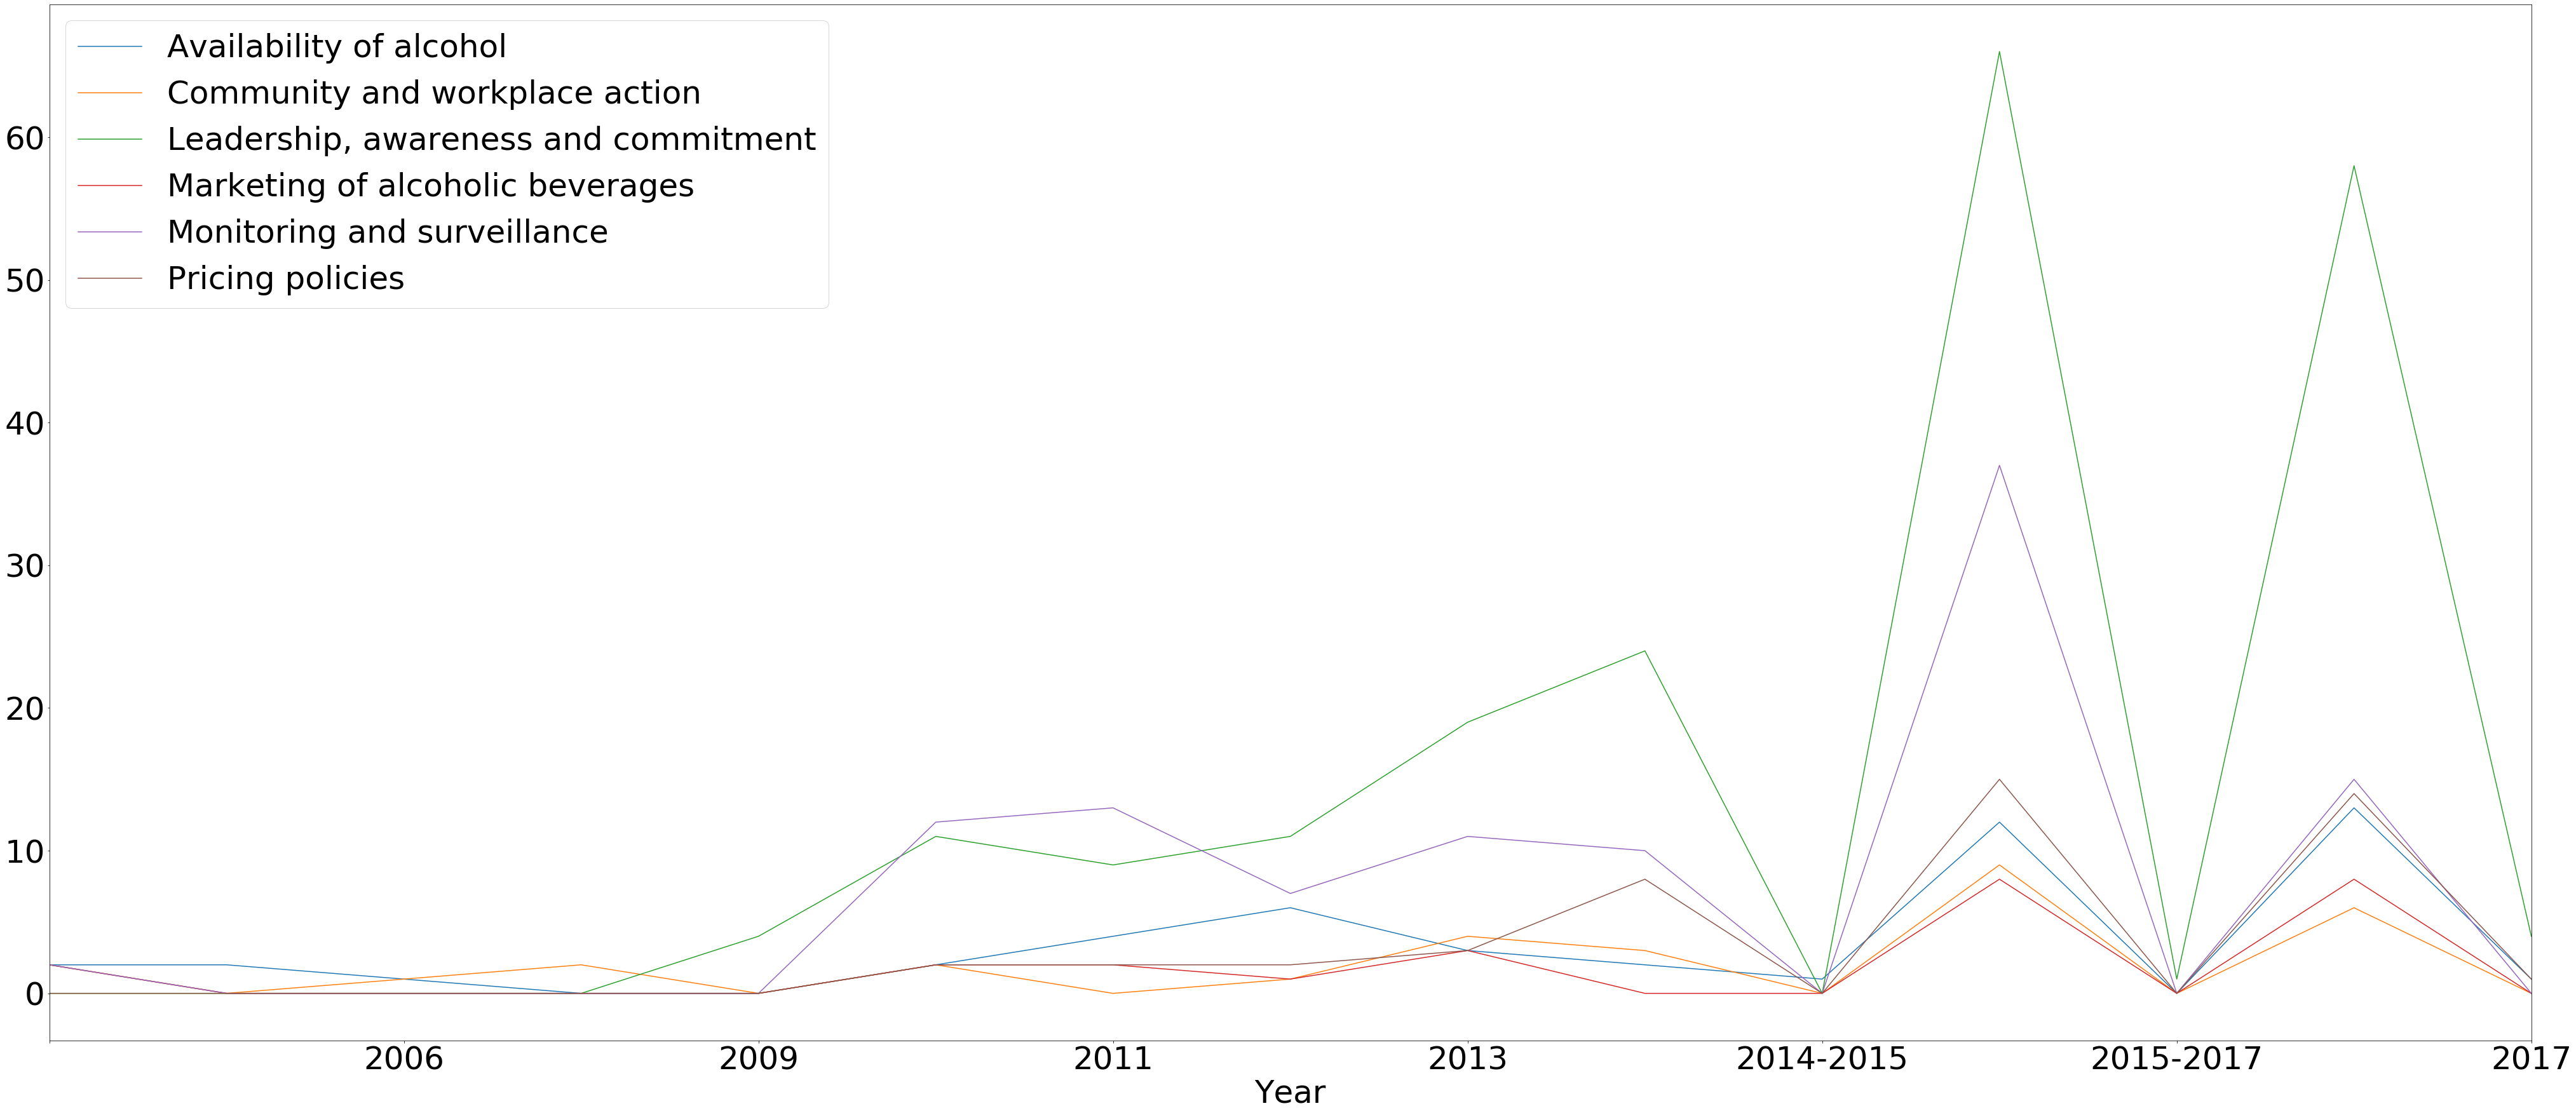

In [130]:
policy_by_year.plot()

**Eliminate 2014-2015 and 2015-2017 as not clear which year they actually took place**

In [131]:
policy_by_year = policy_by_year.drop(['2014-2015', '2015-2017'])

**Eliminate years where not enough data is gathered (before 2012 and 2017)**

In [132]:
policy_by_year_final = policy_by_year.drop(policy_by_year.index[[0,1,2,3,4,5,6,12]])

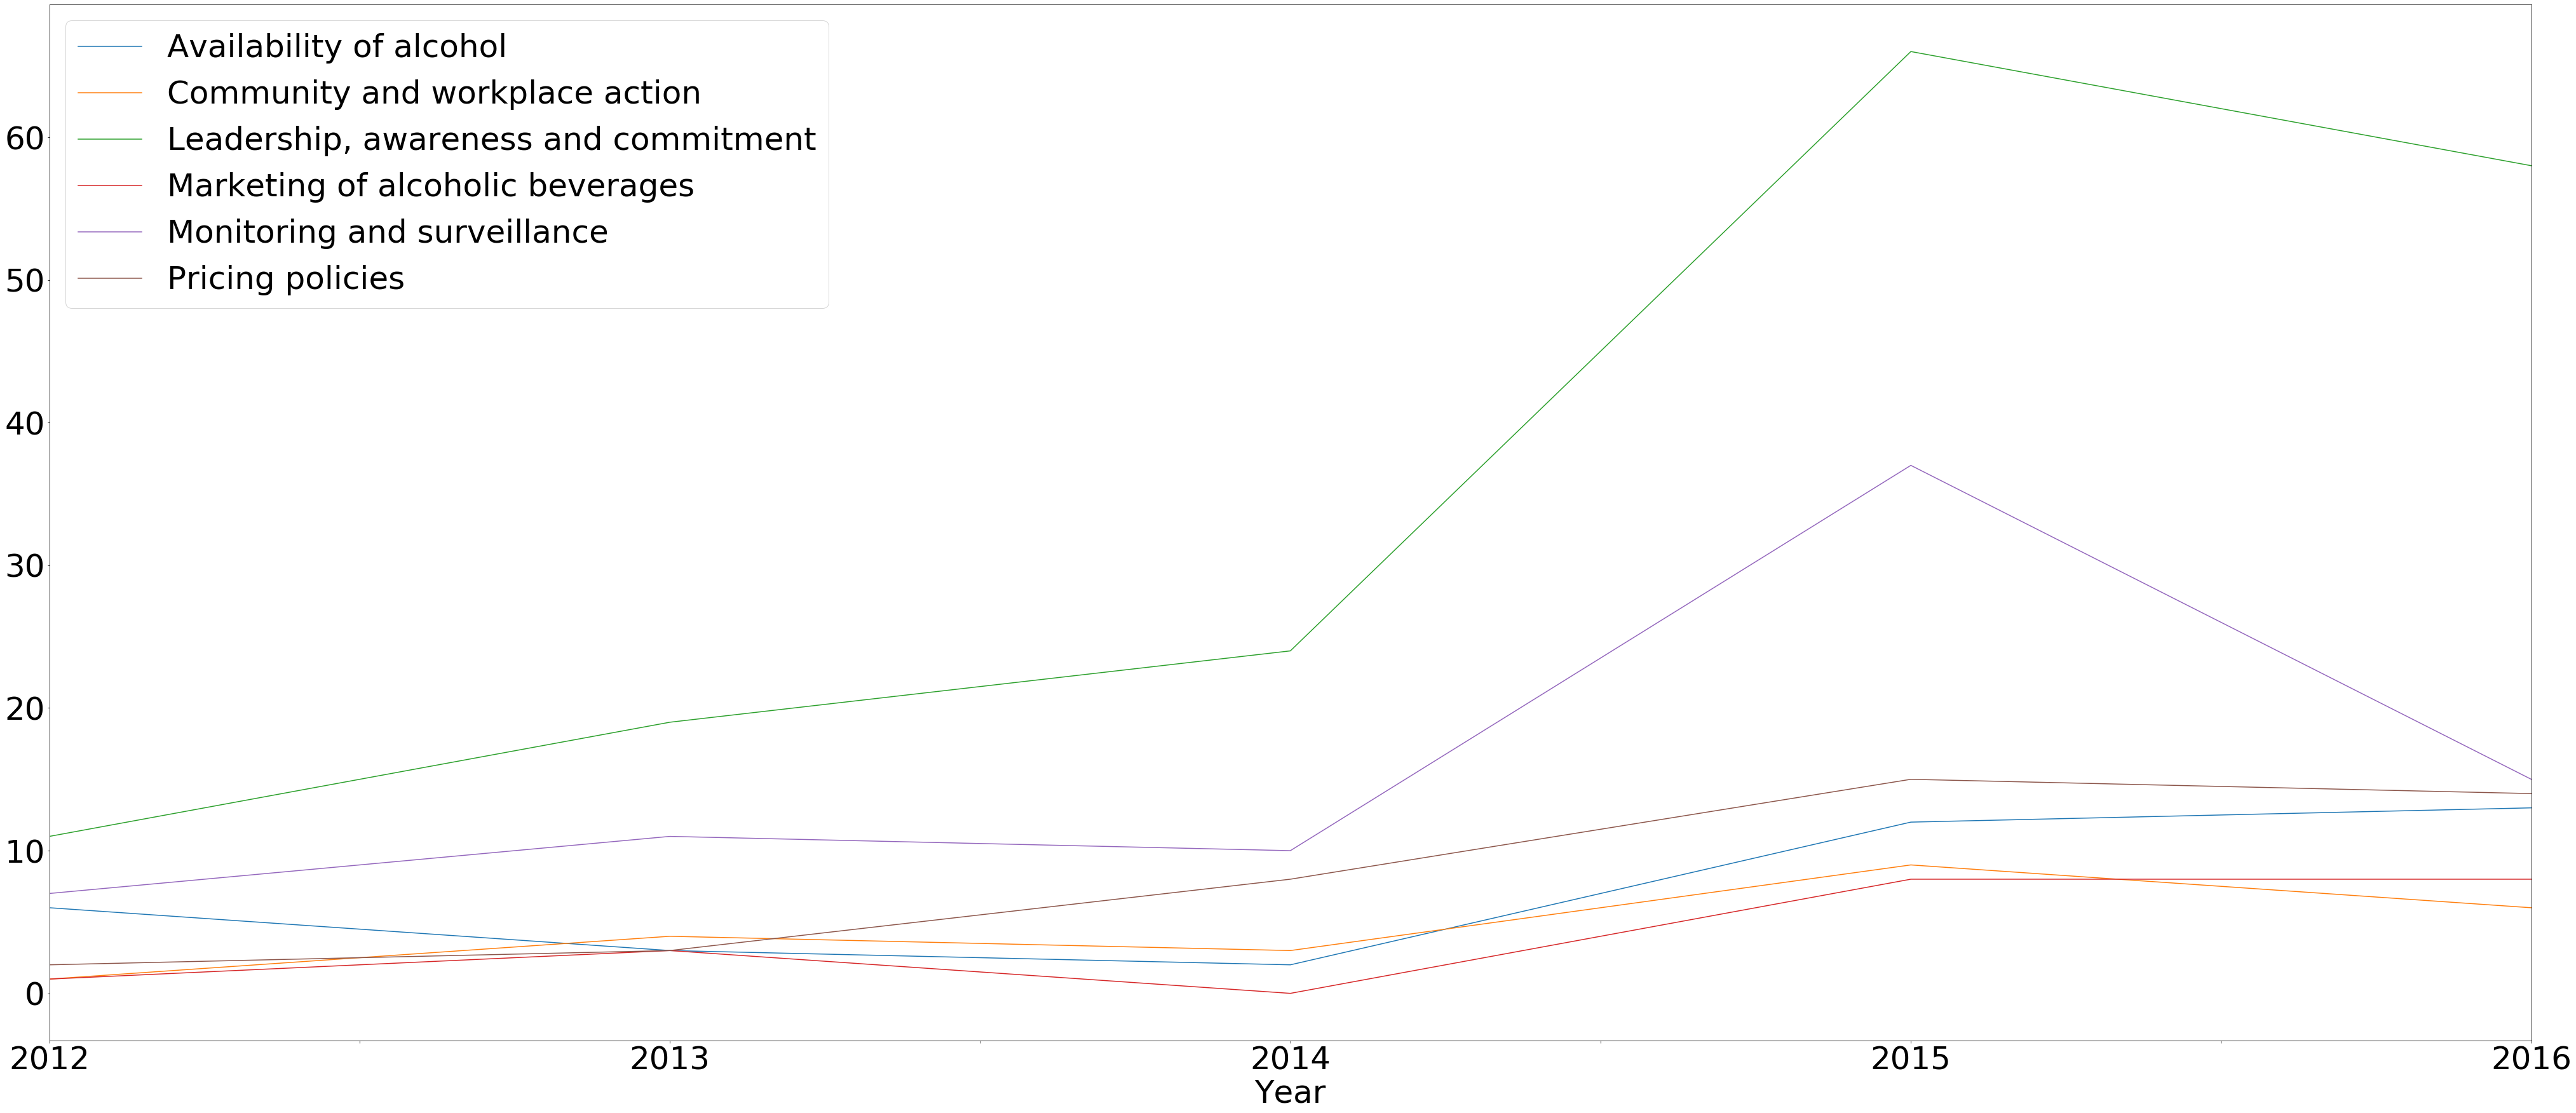

In [133]:
policy_by_year_final.plot()

**check policies by country**

In [134]:
policy_by_country = merged_policy_df_number.groupby("Country").sum()

In [135]:
policy_by_country

,Availability of alcohol,Community and workplace action,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Country,,,,,,
Afghanistan,0,1,0,0,0,0
Australia,0,0,0,1,1,0
Austria,0,0,3,0,0,0
Azerbaijan,0,0,1,0,0,0
Bahamas,0,0,1,0,0,0
...,...,...,...,...,...,...
Republic of Korea,0,0,1,0,0,0
Singapore,0,0,1,0,0,0
Solomon Islands,0,0,3,0,0,0


In [136]:
test = policy_by_country.sort_values('Leadership, awareness and commitment', ascending=False)

In [137]:
test

,Availability of alcohol,Community and workplace action,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Country,,,,,,
Switzerland,0,1,13,0,4,0
United Kingdom of Great Britain and Northern Ireland,9,15,10,1,3,3
Latvia,0,0,6,0,1,1
Spain,0,0,6,0,2,0
New Zealand,0,0,5,0,0,0
...,...,...,...,...,...,...
Kazakhstan,1,0,0,1,0,0
Dominica,0,0,0,0,0,1
Tonga,1,0,0,0,0,1


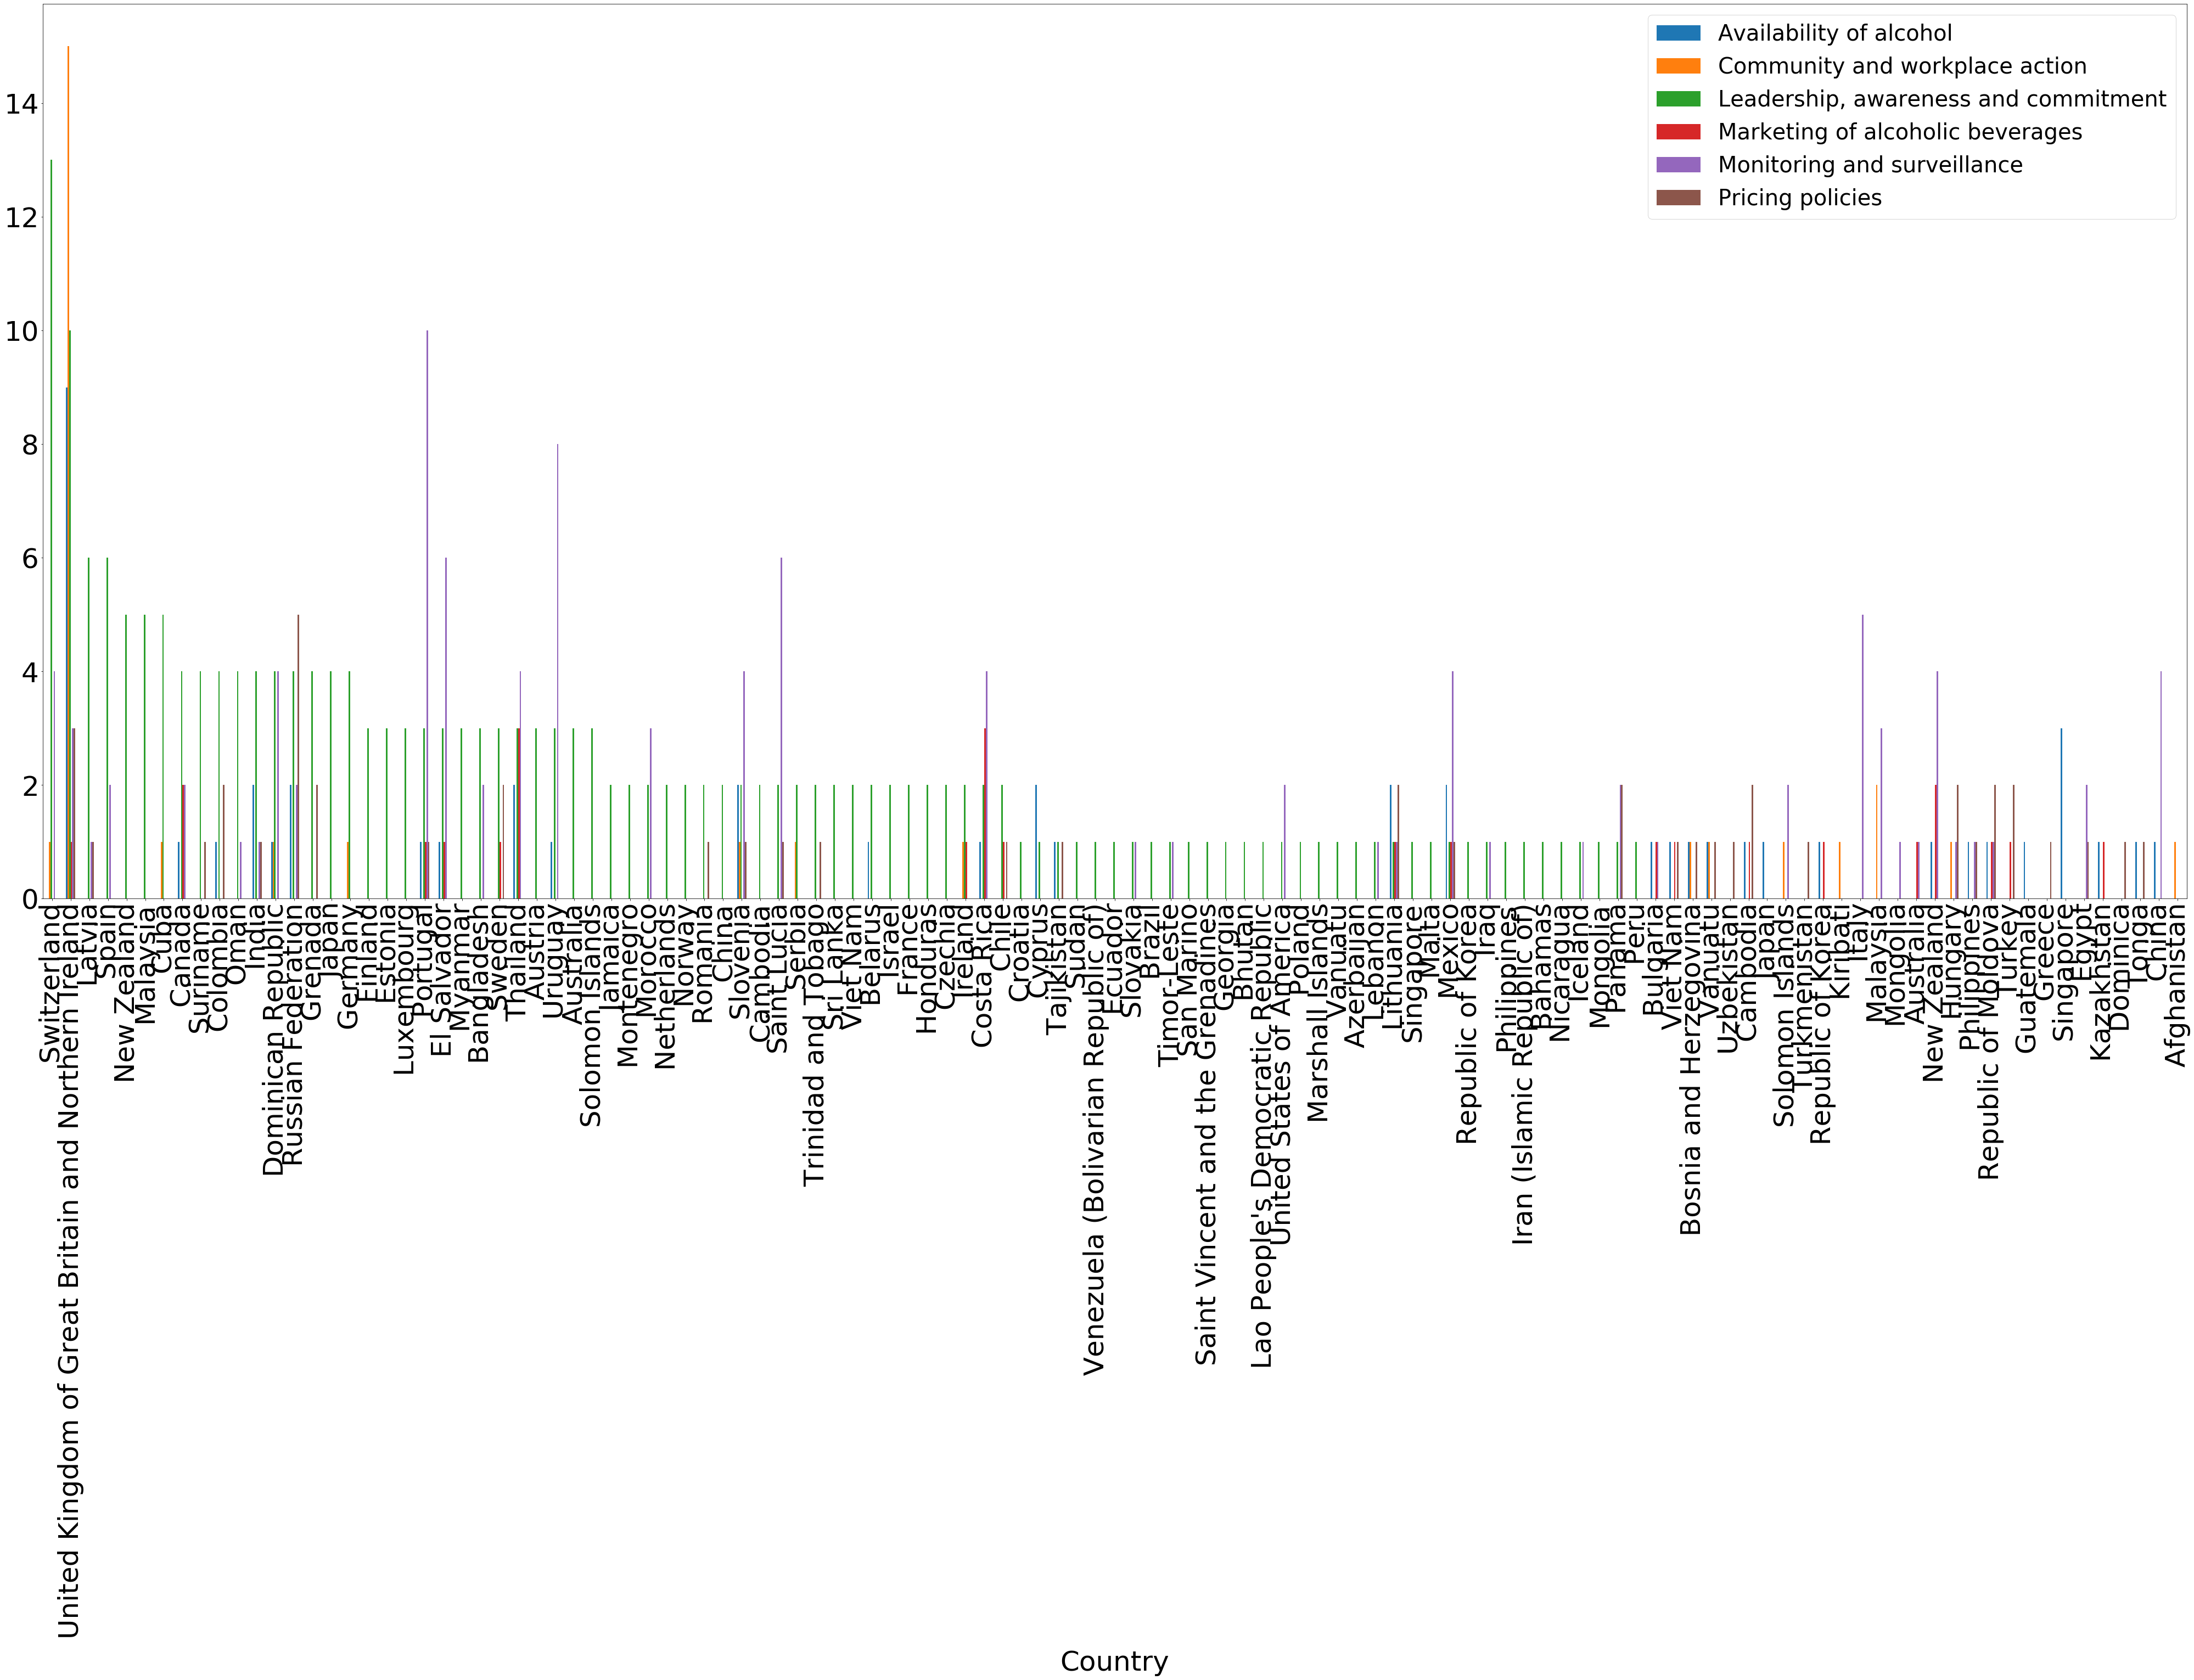

In [138]:
test.plot.bar()
plt.rcParams["figure.figsize"] = [100,50]
plt.legend(loc=1, prop={'size': 40})
plt.rcParams.update({'font.size': 62})

check which policy is most used in which region

See what countries are missing and in which region

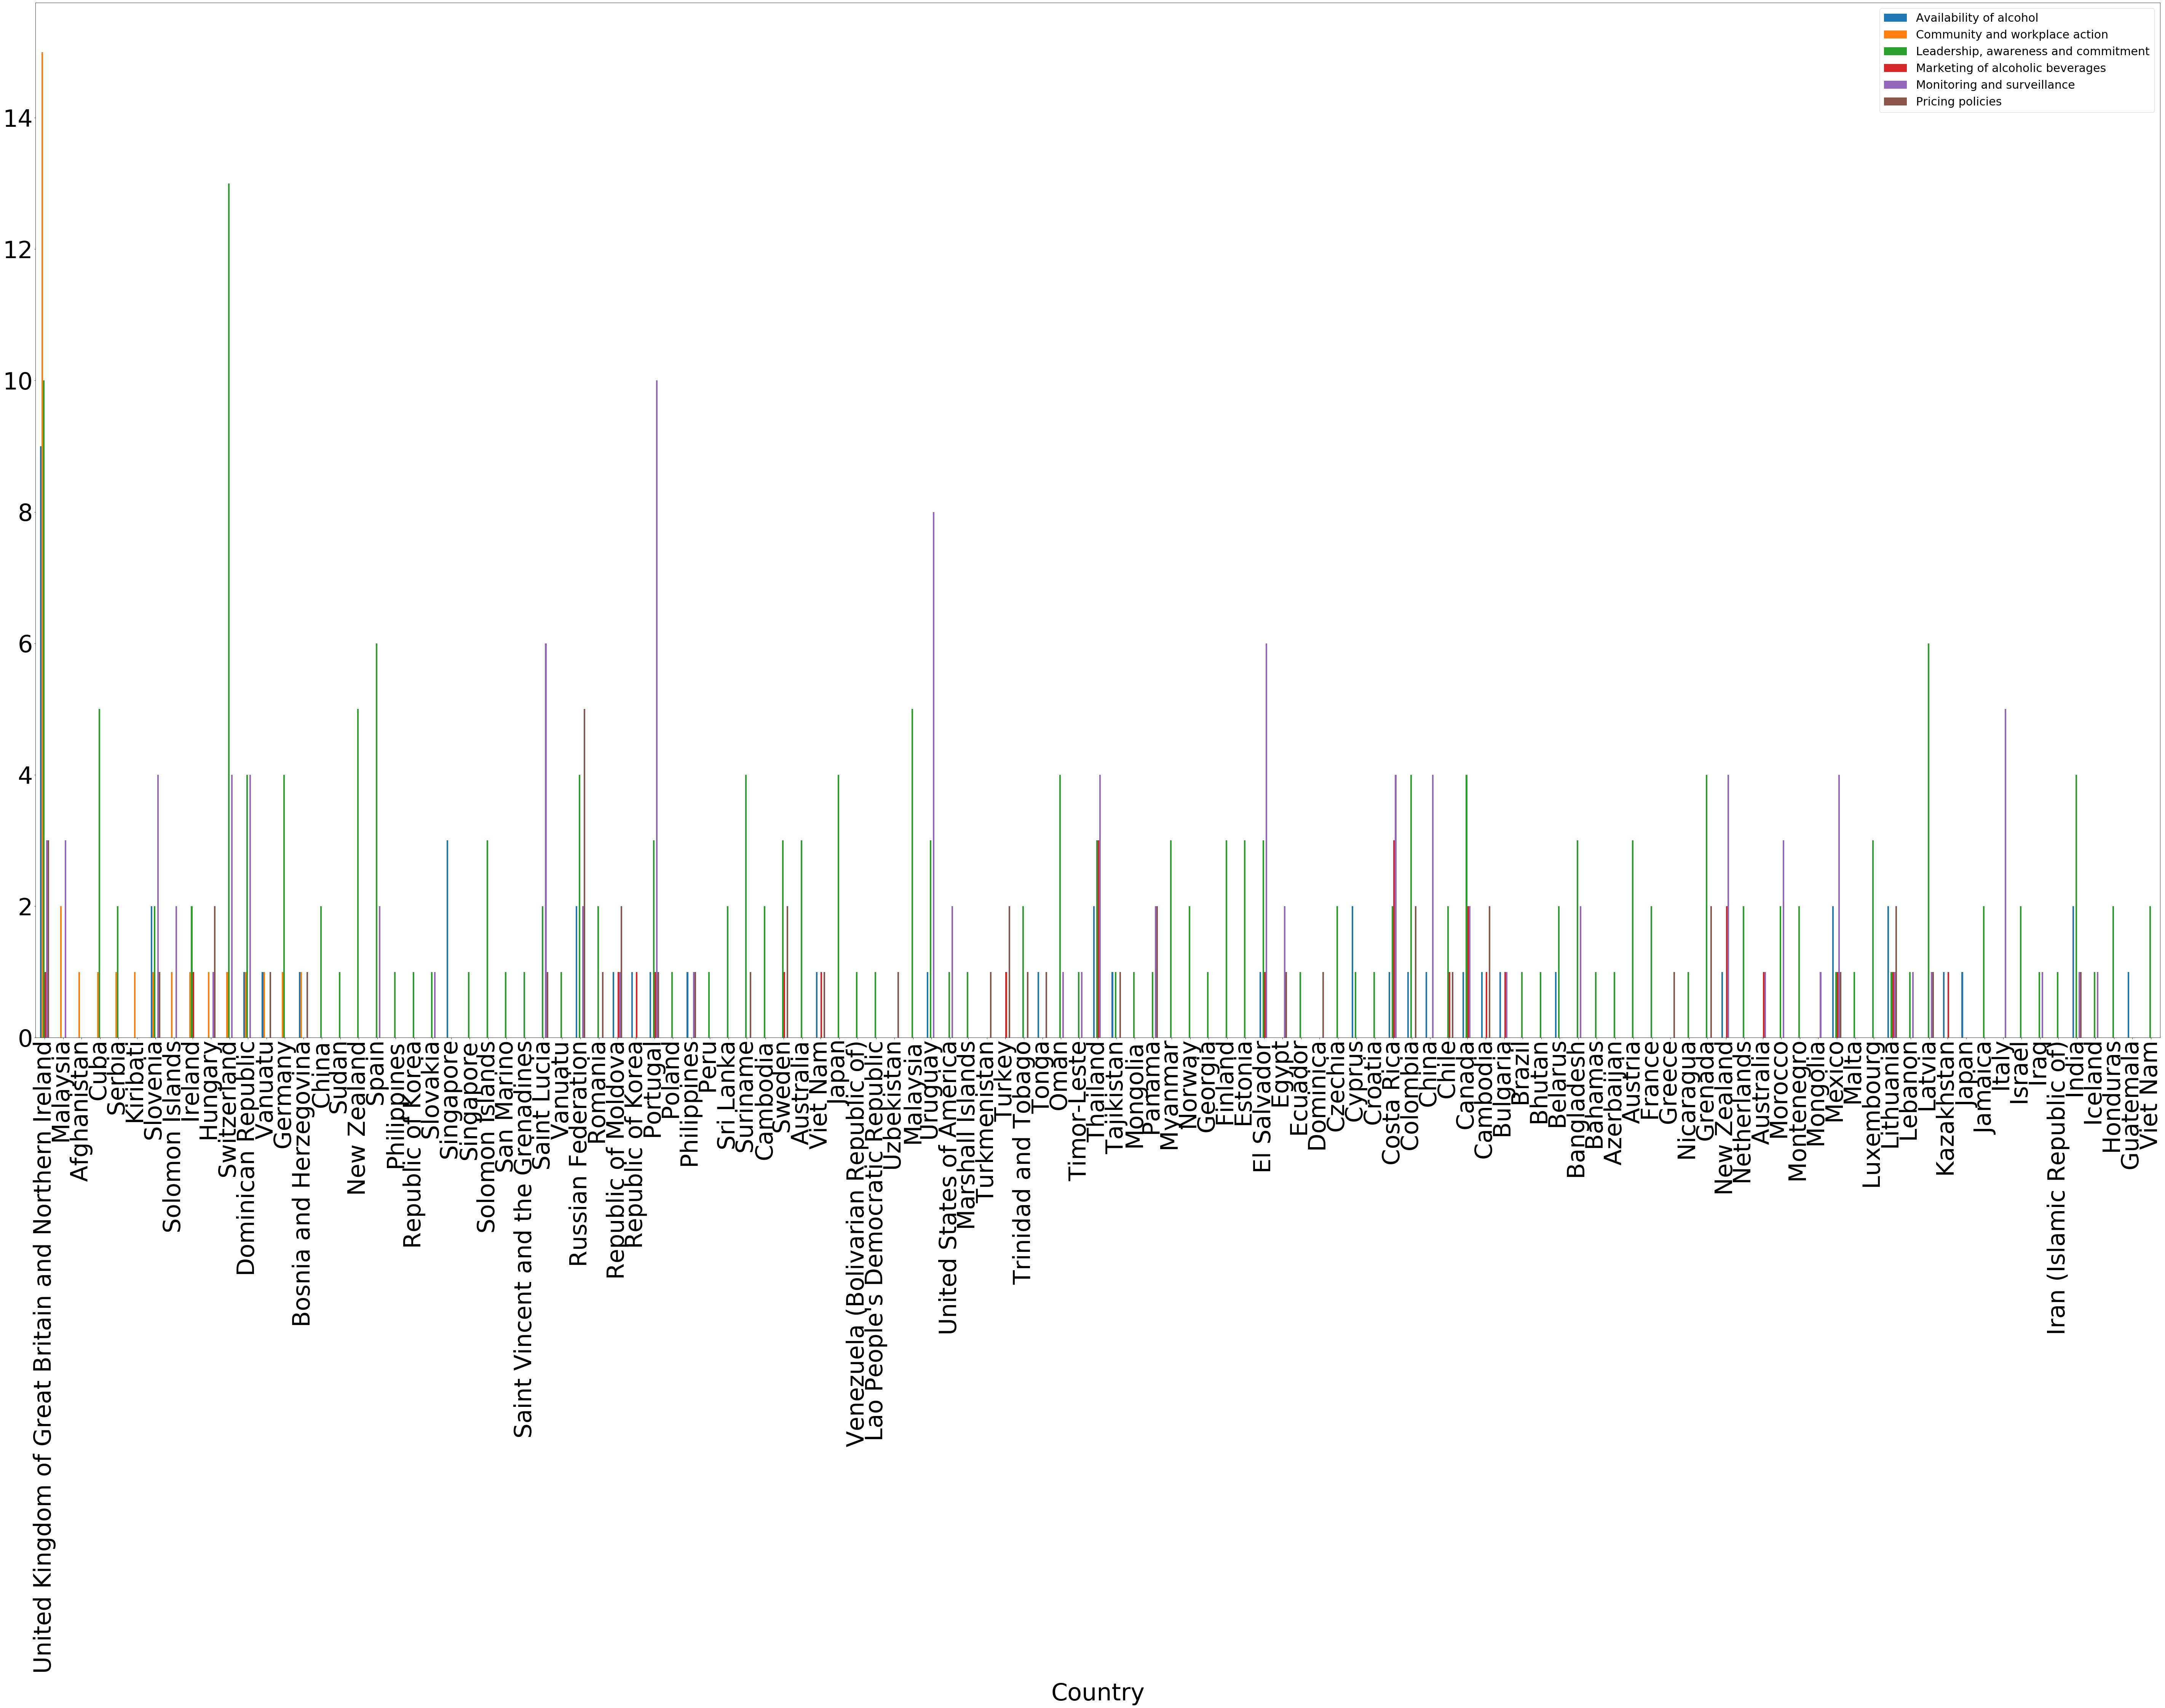

In [139]:
test = policy_by_country.sort_values('Community and workplace action', ascending=False)
test.plot.bar()
plt.rcParams["figure.figsize"] = [70,30]
plt.legend(loc=1, prop={'size': 30})
plt.rcParams.update({'font.size': 50})

## Controlling policies by country and religion

In [140]:
merged_countries = pd.read_csv("/home/tomas/ADA/Notorious_ADA_Projet_2019/Country_religion/merged_countries.csv")


In [168]:
policies_regions = pd.merge(merged_countries, merged_policy_df_index)

In [169]:
policies_regions.head(10)

,Unnamed: 0,Code,Country,Region,Religion,Availability of alcohol,Community and workplace action,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies,Year
0,52,KHM,Cambodia,Asia-Pacific Group,Buddhist,0,0,1,0,0,0,2016
1,52,KHM,Cambodia,Asia-Pacific Group,Buddhist,0,0,1,0,0,0,2013
2,53,CHN,China,Asia-Pacific Group,Officially atheist,0,0,1,0,0,0,2012
3,53,CHN,China,Asia-Pacific Group,Officially atheist,0,0,1,0,0,0,2011
4,60,JPN,Japan,Asia-Pacific Group,Shintoist and Buddhist,0,0,1,0,0,0,2016
5,60,JPN,Japan,Asia-Pacific Group,Shintoist and Buddhist,0,0,1,0,0,0,2015
6,60,JPN,Japan,Asia-Pacific Group,Shintoist and Buddhist,0,0,1,0,0,0,2014
7,60,JPN,Japan,Asia-Pacific Group,Shintoist and Buddhist,0,0,1,0,0,0,2013
8,68,MYS,Malaysia,Asia-Pacific Group,Islam,0,0,1,0,0,0,2016
9,68,MYS,Malaysia,Asia-Pacific Group,Islam,0,0,1,0,0,0,2015


In [182]:
asia_pacific = policies_regions[policies_regions['Region'].str.contains("Asia-Pacific")]
africa = policies_regions[policies_regions['Region'].str.contains("Africa")]
west = policies_regions[policies_regions['Region'].str.contains("West")]

In [181]:
asia_pacific.groupby("Year").sum()


,Unnamed: 0
Year,
2010,153
2011,53
2012,138
2013,180
2014,212
2015,285
2016,427


In [183]:
africa.groupby("Year").sum()

,Unnamed: 0
Year,


In [185]:
west.groupby("Year").sum()

,Unnamed: 0
Year,
2010,150
2011,168
2012,150
2013,168
2014,318
2015,168
2016,168


,Unnamed: 0,Code,Region,Religion,Availability of alcohol,Community and workplace action,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies,Year
Country,,,,,,,,,,,
Australia,3,3,3,3,3,3,3,3,3,3,3
New Zealand,5,5,5,5,5,5,5,5,5,5,5


## Extract policies for 4 countries for case study

In [143]:
switzerland = merged_policy_df_index[merged_policy_df_index['Country'].str.contains("Switzerland")]
switzerland = switzerland.sort_values('Year', ascending=False)

In [144]:
switzerland

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Year,,,,,,,
2016,0,0,Switzerland,1,0,0,0
2016,0,0,Switzerland,1,0,0,0
2015,0,0,Switzerland,0,0,1,0
2015,0,0,Switzerland,1,0,0,0
2015,0,0,Switzerland,1,0,0,0
2015,0,0,Switzerland,1,0,0,0
2015,0,0,Switzerland,1,0,0,0
2015,0,0,Switzerland,0,0,1,0
2015,0,0,Switzerland,1,0,0,0


alcohol consumption has been a very hot topic in these last years in Switzerland

In [145]:
ukraine = merged_policy_df_index[merged_policy_df_index['Country'].str.contains("Ukraine")]
ukraine = ukraine.sort_values('Year', ascending=False)

In [146]:
ukraine

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Year,,,,,,,


No data., looks strange

In [147]:
china = merged_policy_df_index[merged_policy_df_index['Country'].str.contains("China")]
china = china.sort_values('Year', ascending=False)

In [148]:
china

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Year,,,,,,,
2015,0,0,China,0,0,1,0
2014,0,0,China,0,0,1,0
2013,0,0,China,0,0,1,0
2012,1,0,China,0,0,0,0
2012,0,0,China,1,0,0,0
2011,0,0,China,1,0,0,0
2010,0,0,China,0,0,1,0


We have information on every year until 2010 from China, which is reassuring

In [149]:
france = merged_policy_df_index[merged_policy_df_index['Country'].str.contains("France")]
france = france.sort_values('Year', ascending=False)

In [150]:
france

,Availability of alcohol,Community and workplace action,Country,"Leadership, awareness and commitment",Marketing of alcoholic beverages,Monitoring and surveillance,Pricing policies
Year,,,,,,,
2016,0,0,France,1,0,0,0
2015,0,0,France,1,0,0,0


It seems that France did not enact any policies about alcohol in the last 10 years. As a member of the EU it seems more likely that they have nothing to report than that no data has been collected from the WHO on the alcohol policy of France

**Information for the case study needs to be taken by the team members from other sources**